In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Selecionar colunas específicas
colunas_selecionadas = ['V0001', 'Q06306']

# Carregar o arquivo CSV
df = pd.read_csv(r'C:\Users\llays\OneDrive\Documentos\GitHub\DoencasCardiacas\PNS2019\pns2019.csv', usecols=colunas_selecionadas)

dornocoracao = df[colunas_selecionadas]

# Substituir strings que representam NaN por NaN do pandas
dornocoracao['Q06306'] = pd.to_numeric(dornocoracao['Q06306'], errors='coerce')

# Remover linhas onde Q06306 é NaN
dornocoracao_limpo = dornocoracao.dropna(subset=['Q06306'])

# Verificar os dados após a limpeza
print(dornocoracao_limpo['Q06306'].unique())
print(dornocoracao_limpo.head())

[2. 1.]
    V0001  Q06306
0      11     2.0
9      11     2.0
10     11     2.0
18     11     2.0
19     11     2.0


C:\Users\llays\AppData\Local\Temp\ipykernel_8576\3015490804.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dornocoracao_limpo['V0001'] = dornocoracao_limpo['V0001'].map(mapeamento_estados)
C:\Users\llays\AppData\Local\Temp\ipykernel_8576\3015490804.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dornocoracao_limpo['Região'] = dornocoracao_limpo['V0001'].apply(estado_para_regiao)


In [ ]:
# Mapear códigos de estado para nomes
mapeamento_estados = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

# Mapear estados para regiões
mapeamento_regioes = {
    'Norte': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'],
    'Nordeste': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Sudeste': ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Santa Catarina', 'Rio Grande do Sul'],
    'Centro-Oeste': ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
}

# Substituir os códigos pelos nomes dos estados
dornocoracao_limpo['V0001'] = dornocoracao_limpo['V0001'].map(mapeamento_estados)

# Mapear estados para regiões
def estado_para_regiao(estado):
    for regiao, estados in mapeamento_regioes.items():
        if estado in estados:
            return regiao
    return None

dornocoracao_limpo['Região'] = dornocoracao_limpo['V0001'].apply(estado_para_regiao)

# Agrupar por estado e contar os valores de Q06306
contagem_doenca = dornocoracao_limpo.groupby(['V0001', 'Q06306']).size().unstack(fill_value=0)

### ESTADO

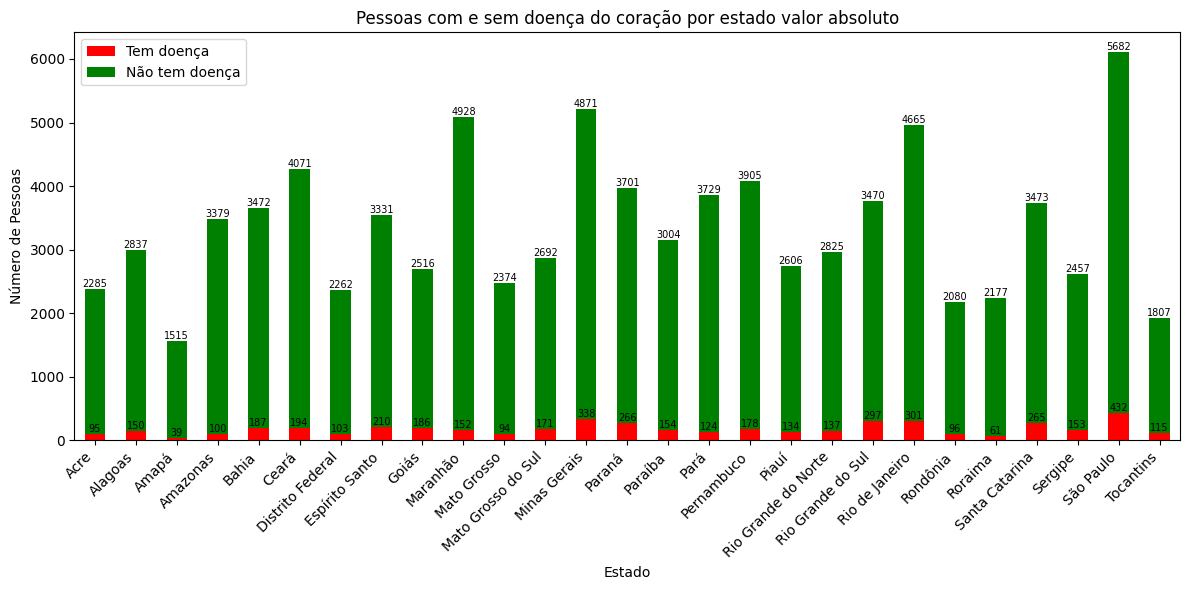

In [2]:
# Criar o gráfico de barras empilhadas com valores absolutos
ax = contagem_doenca.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Estado')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem doença do coração por estado valor absoluto')
plt.legend(['Tem doença', 'Não tem doença'])
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade

# Adicionar os valores em cima das barras com fonte menor e ajustes de posição
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Somente adicionar texto se a altura da barra for maior que 0
        ax.text(
            x + width / 2,  # Posição horizontal: centro da barra
            y + height,      # Posição vertical: topo da barra
            f'{int(height)}',  # Texto: valor da altura
            ha='center',     # Alinhamento horizontal: centralizado
            va='bottom',     # Alinhamento vertical: na base do texto
            fontsize=7,      # Tamanho da fonte menor
            color='black'    # Cor do texto
        )

plt.tight_layout()  # Ajustar layout para evitar cortes

# Caminho da pasta onde o gráfico será salvo
caminho_da_pasta = "Imagens"

# Verificar se a pasta existe; se não, criá-la
if not os.path.exists(caminho_da_pasta):
    os.makedirs(caminho_da_pasta)

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_absoluto_estado.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()

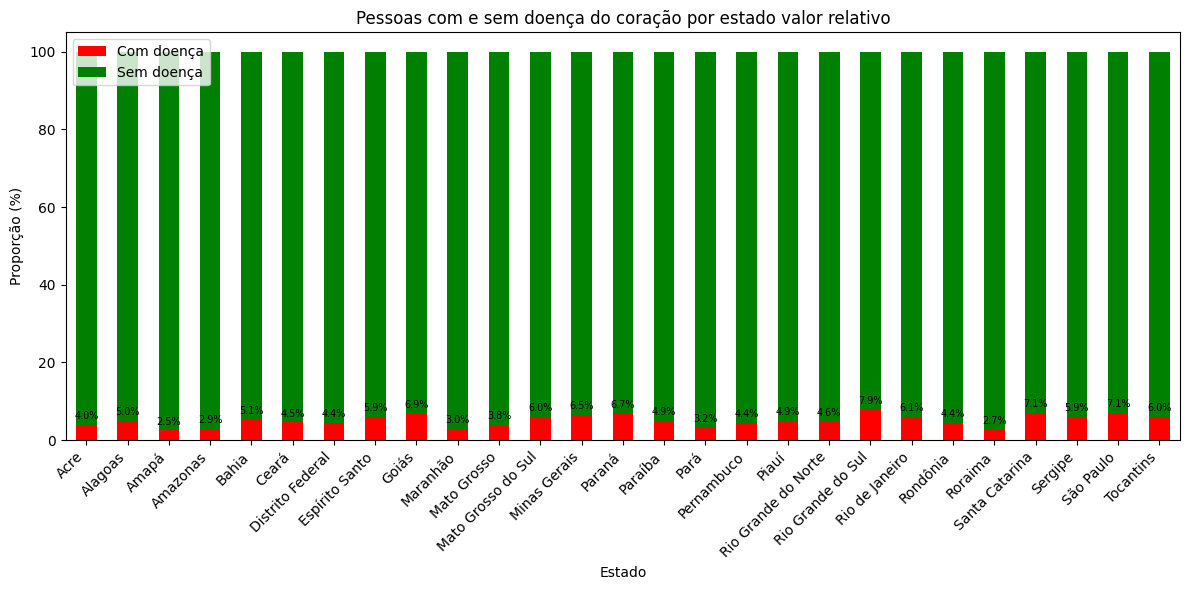

In [3]:
# Calcular o total de pessoas por estado
contagem_doenca['Total'] = contagem_doenca.sum(axis=1)

# Calcular as proporções (valores relativos)
contagem_doenca['Com doença (%)'] = (contagem_doenca[1] / contagem_doenca['Total']) * 100
contagem_doenca['Sem doença (%)'] = (contagem_doenca[2] / contagem_doenca['Total']) * 100

# Criar o gráfico de barras empilhadas com valores relativos
ax = contagem_doenca[['Com doença (%)', 'Sem doença (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Estado')
plt.ylabel('Proporção (%)')
plt.title('Pessoas com e sem doença do coração por estado valor relativo')

# Adicionar a legenda no canto superior esquerdo
plt.legend(['Com doença', 'Sem doença'], loc='upper left')

plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade

# Adicionar os valores percentuais em cima da parte vermelha (Com doença (%))
for i, (com_doenca, sem_doenca) in enumerate(zip(contagem_doenca['Com doença (%)'], contagem_doenca['Sem doença (%)'])):
    if com_doenca > 0:  # Somente adicionar texto se o valor for maior que 0
        ax.text(
            i,  # Posição horizontal: centro da barra
            com_doenca + 1,  # Posição vertical: topo da barra "Com doença (%)" + pequeno offset
            f'{com_doenca:.1f}%',  # Texto: valor percentual formatado com 1 casa decimal
            ha='center',  # Alinhamento horizontal: centralizado
            va='bottom',  # Alinhamento vertical: na base do texto
            fontsize=7,  # Tamanho da fonte menor
            color='black'  # Cor do texto
        )

plt.tight_layout()  # Ajustar layout para evitar cortes

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_relativo_estado.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()

### REGIÃO

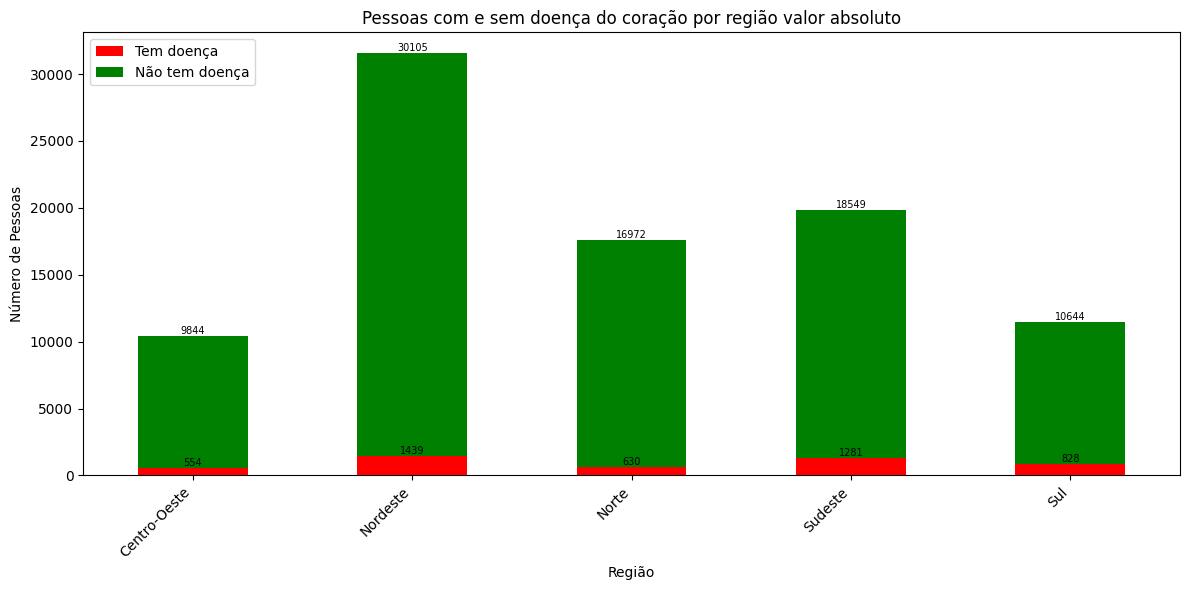

In [4]:
# Agrupar por região 
contagem_doenca_regiao = dornocoracao_limpo.groupby(['Região', 'Q06306']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas com valores absolutos
ax = contagem_doenca_regiao.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Região')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem doença do coração por região valor absoluto')
plt.legend(['Tem doença', 'Não tem doença'], loc='upper left')  # Legenda no canto superior esquerdo
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade

# Adicionar os valores em cima das barras com fonte menor e ajustes de posição
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Somente adicionar texto se a altura da barra for maior que 0
        ax.text(
            x + width / 2,  # Posição horizontal: centro da barra
            y + height,      # Posição vertical: topo da barra
            f'{int(height)}',  # Texto: valor da altura
            ha='center',     # Alinhamento horizontal: centralizado
            va='bottom',     # Alinhamento vertical: na base do texto
            fontsize=7,      # Tamanho da fonte menor
            color='black'    # Cor do texto
        )

plt.tight_layout()  # Ajustar layout para evitar cortes

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_absoluto_regiao.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()

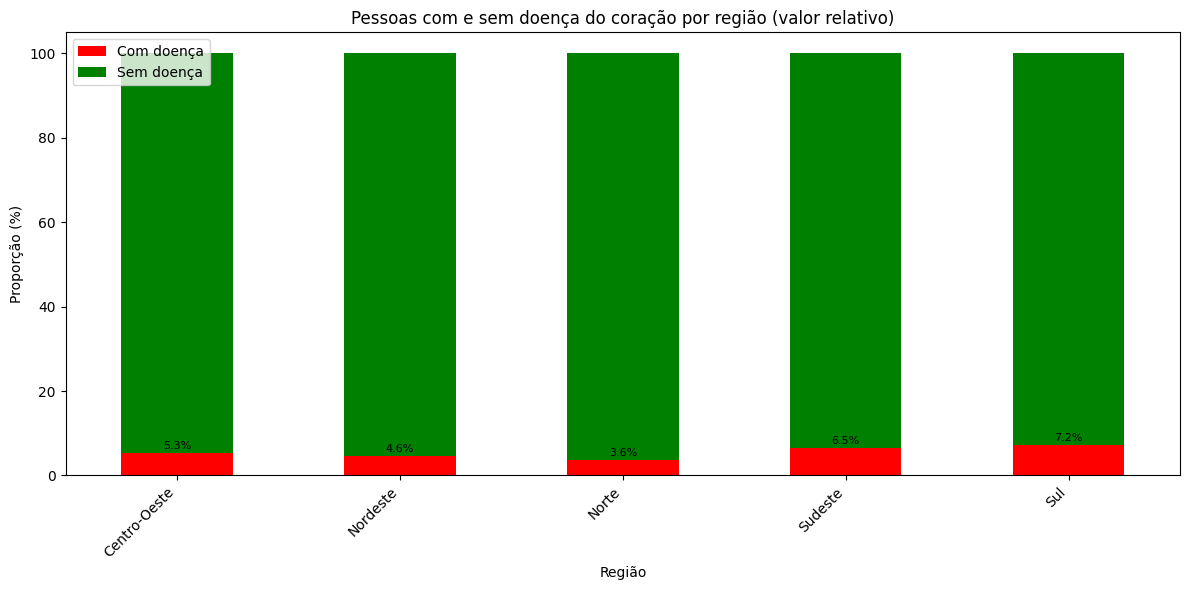

In [5]:
# Agrupar por região e contar os valores de Q06306
contagem_doenca = dornocoracao_limpo.groupby(['Região', 'Q06306']).size().unstack(fill_value=0)

# Calcular o total de pessoas por região
contagem_doenca['Total'] = contagem_doenca.sum(axis=1)

# Calcular as proporções (valores relativos)
contagem_doenca['Com doença (%)'] = (contagem_doenca[1] / contagem_doenca['Total']) * 100
contagem_doenca['Sem doença (%)'] = (contagem_doenca[2] / contagem_doenca['Total']) * 100

# Criar o gráfico de barras empilhadas com valores relativos
ax = contagem_doenca[['Com doença (%)', 'Sem doença (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Região')
plt.ylabel('Proporção (%)')
plt.title('Pessoas com e sem doença do coração por região (valor relativo)')
plt.legend(['Com doença', 'Sem doença'], loc='upper left')  # Legenda no canto superior esquerdo
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade

# Adicionar os valores percentuais em cima da parte vermelha (Com doença (%))
for i, (com_doenca, sem_doenca) in enumerate(zip(contagem_doenca['Com doença (%)'], contagem_doenca['Sem doença (%)'])):
    if com_doenca > 0:  # Somente adicionar texto se o valor for maior que 0
        ax.text(
            i,  # Posição horizontal: centro da barra
            com_doenca + 0.5,  # Posição vertical: topo da barra "Com doença (%)" + pequeno offset
            f'{com_doenca:.1f}%',  # Texto: valor percentual formatado com 1 casa decimal
            ha='center',  # Alinhamento horizontal: centralizado
            va='bottom',  # Alinhamento vertical: na base do texto
            fontsize=8,  # Tamanho da fonte 8
            color='black'  # Cor do texto
        )

plt.tight_layout()  # Ajustar layout para evitar cortes

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_relativo_regiao.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()